## Employee Attrition Prediction

### 1. Data Preprocessing

Handle Categorical Data by Encoding:
I will use Label Encoding for binary categorical variables and One-Hot Encoding for multiclass categorical variables.

Scale Numerical Features for Consistency:
Using StandardScaler to ensure numerical features are standardized.

Prepare and Save Preprocessed Data:
I'll save the preprocessed data as `preprocessed_data.csv`.


In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the dataset

In [67]:
data = pd.read_csv('ith.csv')

Drop unnecessary columns

In [68]:
data = data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])

Apply Label Encoding for binary categorical columns

In [69]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

One-hot encoding the specified columns

In [70]:
data_encoded = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'],drop_first=True)
for col in data_encoded.columns: 
    if data_encoded[col].dtype == 'bool':
        data_encoded[col] = data_encoded[col].astype(int)

Scale numerical features

In [71]:
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

Save the preprocessed data to a new CSV file

In [ ]:

data_encoded.to_csv('preprocessed_data.csv', index=False)

### 2. Model Building

Build a Predictive Model:
I'll use the Random Forest algorithm to classify employees likely to leave the company (target: Attrition).


Prepare features and target:
Define `X` (features) and `y` (target) required for model training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Attrition'])
y = data_encoded['Attrition']

Split the data into training and testing sets (70/30)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Build and train the Random Forest model

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3. Performance Evaluation

Evaluate Model's Performance:
I'll evaluate the model's performance using metrics such as Accuracy, Precision, Recall, F1-Score, and present a confusion matrix.


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


 Predict on the test set

In [26]:
y_pred = model.predict(X_test)

Evaluate the model

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8571428571428571
Precision: 0.4
Recall: 0.06557377049180328
F1-Score: 0.11267605633802817


Present confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[374   6]
 [ 57   4]]


#### Interactive Confusion Matrix with Counts

In [56]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix

Function to create a confusion matrix plot with counts only

In [ ]:

def plot_confusion_matrix(cm, labels):
    z_text = [[str(y) for y in x] for x in cm]
    
    # Create the plot
    fig = ff.create_annotated_heatmap(cm, x=labels, y=labels, annotation_text=z_text, colorscale='Viridis')

    fig.update_layout(
        title="Confusion Matrix with Counts",
        xaxis=dict(title="Predicted"),
        yaxis=dict(title="Actual"),
    )
    
    fig.show()

Labels for the classes

In [58]:
labels = ['Not Attrition', 'Attrition']

Compute the confusion matrix

In [59]:
cm = confusion_matrix(y_test, y_pred)

Plot the confusion matrix

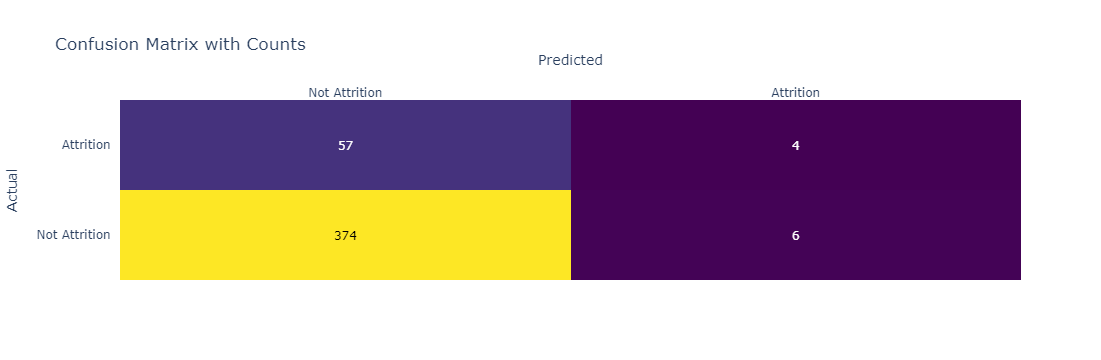

In [60]:
plot_confusion_matrix(cm, labels)

### 4. Model Optimization

Hyperparameter Tuning with GridSearchCV: 
I'll use GridSearchCV to find the best hyperparameters for the Random Forest model.


In [ ]:
from sklearn.model_selection import GridSearchCV

Define the parameter grid

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Create a GridSearchCV object

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

Fit the grid search to the data

In [36]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

 Print the best parameters found

In [ ]:
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


Build and train the optimized model

In [45]:
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)

Predict on the test set with the optimized model

In [46]:
y_pred_optimized = optimized_model.predict(X_test)

Evaluate the optimized model

In [47]:
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

In [48]:
print("Optimized Accuracy:", accuracy_optimized)
print("Optimized Precision:", precision_optimized)
print("Optimized Recall:", recall_optimized)
print("Optimized F1-Score:", f1_optimized)

Optimized Accuracy: 0.8639455782312925
Optimized Precision: 0.5384615384615384
Optimized Recall: 0.11475409836065574
Optimized F1-Score: 0.1891891891891892


Present optimized confusion matrix

In [49]:
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
print("Optimized Confusion Matrix:")
print(conf_matrix_optimized)

Optimized Confusion Matrix:
[[374   6]
 [ 54   7]]


#### Interactive Optimized Confusion Matrix with Counts

In [61]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix

Function to create a confusion matrix plot with counts only

In [65]:
def plot_confusion_matrix(cm, labels):
    z_text = [[str(y) for y in x] for x in cm]
    
    # Create the plot
    fig = ff.create_annotated_heatmap(cm, x=labels, y=labels, annotation_text=z_text, colorscale='Viridis')

    fig.update_layout(
        title="Optimized Confusion Matrix with Counts",
        xaxis=dict(title="Predicted"),
        yaxis=dict(title="Actual"),
    )
    
    fig.show()

Labels for the classes

In [ ]:
labels = ['Not Attrition', 'Attrition']

Compute the confusion matrix for the optimized model


In [62]:
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

Plot the optimized confusion matrix

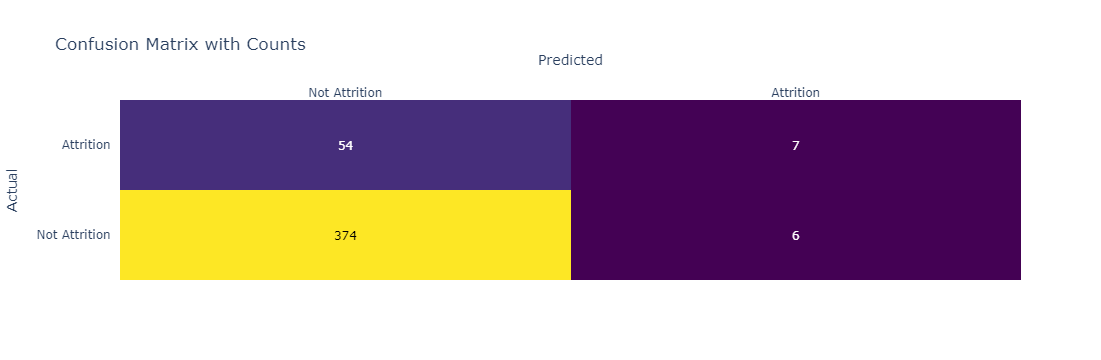

In [64]:
plot_confusion_matrix(cm_optimized, labels)